In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

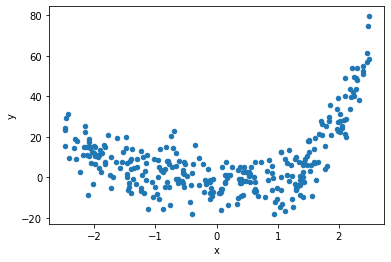

In [2]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y}) 
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

# reshape in order to get it accepted by the models
X = X.reshape(-1, 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [4]:
df.head()

,x,y
0,-2.295547,8.988091
1,-1.470417,1.547632
2,-1.825180,15.047590
3,-0.530846,1.859554
4,-1.154595,-1.412975


# LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n")

7.722428562888061 [3.06339024] 



In [6]:
lin_y = lin_reg.predict(X_test)

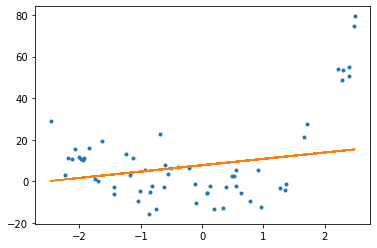

In [9]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot linear regression result
plt.plot(X_test,lin_y)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# k = 3 
knn3_reg = KNeighborsRegressor(n_neighbors=3)
knn3_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
knn3_regY = knn3_reg.predict(X_test)

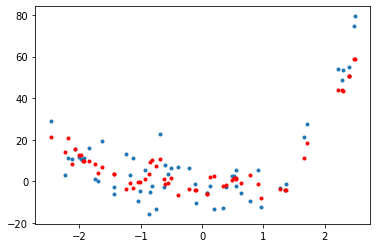

In [12]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot KNN result
plt.plot(X_test,knn3_regY, 'r.')

In [15]:
# k = 5 
knn5_reg = KNeighborsRegressor(n_neighbors=5)
knn5_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [16]:
knn5_regY = knn5_reg.predict(X_test)

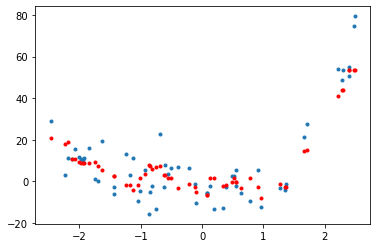

In [17]:
# clear plot if any occurs
plt.clf()
# plot initial points
plt.plot(X_test, y_test,'.')
# plot KNN result
plt.plot(X_test,knn5_regY, 'r.')

# Polynomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
def plot_polynomial(X, y, predY):
    # clear plot
    plt.clf()
    # plot initial points
    plt.plot(X, y,'.')
    # plot KNN result
    plt.plot(X, predY,'r.')

### 2ND GRADE POLYNOMIAL

In [50]:
# 2
poly2_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2_features.fit_transform(X_train)

lin2_reg = LinearRegression()
lin2_reg.fit(X_poly2, y_train)
print("Coefficients: ", lin2_reg.coef_, "\n", "Intercept: ", lin2_reg.intercept_,"\n")
lin2_predY = lin2_reg.predict(poly2_features.fit_transform(X_test))

Coefficients:  [2.89716343 6.17306811] 
 Intercept:  -4.965018089324644 



In [34]:
print(lin2_reg.coef_[1], " x**2 + ", lin2_reg.coef_[0], " x + ", lin2_reg.intercept_)
# print(lin2_reg.coef_[0][1] * 2**2 + lin2_reg.coef_[0][0] * 2 + lin2_reg.intercept_[0])

6.173068111117107  x**2 +  2.8971634263839627  x +  -4.965018089324644


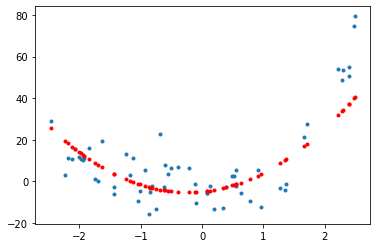

In [71]:
# plot test set
plot_polynomial(X_test, y_test, lin2_predY)

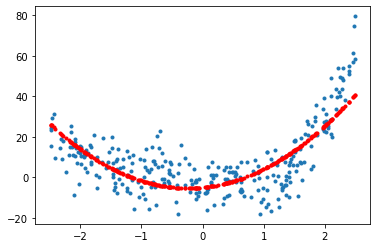

In [76]:
# plot all points
plot_polynomial(X, y, lin2_reg.predict(poly2_features.fit_transform(X)))

### 3ND GRADE POLYNOMIAL

In [77]:
poly3_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3_features.fit_transform(X_train)

lin3_reg = LinearRegression()
lin3_reg.fit(X_poly3, y_train)
print("Coefficients: ", lin3_reg.coef_, "\n", "Intercept: ", lin3_reg.intercept_,"\n")
lin3_predY = lin3_reg.predict(poly3_features.fit_transform(X_test))

Coefficients:  [-4.23267184  6.1787092   2.00396324] 
 Intercept:  -4.73337859316341 



In [78]:
print(lin3_reg.coef_[2], "x**3 +", lin3_reg.coef_[1], "x**2 +", lin3_reg.coef_[0], "x + ", lin3_reg.intercept_)

2.003963236546994 x**3 + 6.178709200807459 x**2 + -4.2326718412581394 x +  -4.73337859316341


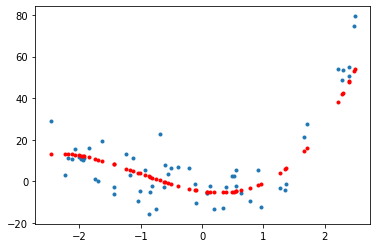

In [79]:
# plot test set
plot_polynomial(X_test, y_test, lin3_predY)

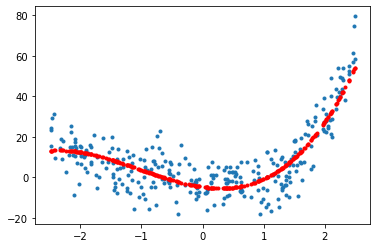

In [80]:
# plot all points
plot_polynomial(X, y, lin3_reg.predict(poly3_features.fit_transform(X)))

### 4ND GRADE POLYNOMIAL

In [87]:
poly4_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly4_features.fit_transform(X_train)

lin4_reg = LinearRegression()
lin4_reg.fit(X_poly4, y_train)
print("Coefficients: ", lin4_reg.coef_, "\n", "Intercept: ", lin4_reg.intercept_,"\n")
lin4_predY = lin4_reg.predict(poly4_features.fit_transform(X_test))

Coefficients:  [-3.99568197  1.3875495   1.98128892  0.91623728] 
 Intercept:  -1.5891592483105956 



In [88]:
print(lin4_reg.coef_[3], "x**4 +", lin4_reg.coef_[2], "x**3 +", lin4_reg.coef_[1], "x**2 +", lin4_reg.coef_[0], "x + ", lin4_reg.intercept_)

0.9162372815352199 x**4 + 1.9812889178488748 x**3 + 1.387549502422423 x**2 + -3.9956819655271953 x +  -1.5891592483105956


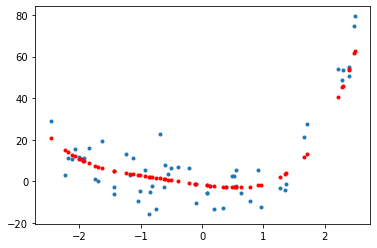

In [89]:
# plot test set
plot_polynomial(X_test, y_test, lin4_predY)

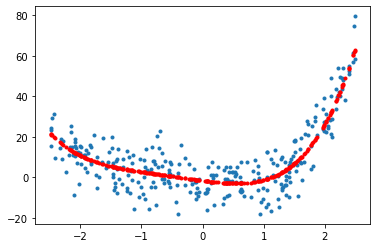

In [90]:
# plot all points
plot_polynomial(X, y, lin4_reg.predict(poly4_features.fit_transform(X)))

### 5ND GRADE POLYNOMIAL

In [92]:
poly5_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly5_features.fit_transform(X_train)

lin5_reg = LinearRegression()
lin5_reg.fit(X_poly5, y_train)
print("Coefficients: ", lin5_reg.coef_, "\n", "Intercept: ", lin5_reg.intercept_,"\n")
lin5_predY = lin5_reg.predict(poly5_features.fit_transform(X_test))

Coefficients:  [-4.87586854  1.3851435   2.63970618  0.91439696 -0.09642743] 
 Intercept:  -1.5858537251985467 



In [93]:
print(lin5_reg.coef_[4], "x**5 +", lin5_reg.coef_[3], "x**4 +", lin5_reg.coef_[2], "x**3 +", lin5_reg.coef_[1], "x**2 +", lin5_reg.coef_[0], "x + ", lin5_reg.intercept_)

-0.09642742865018679 x**5 + 0.9143969602818108 x**4 + 2.6397061813507277 x**3 + 1.3851435034972297 x**2 + -4.875868540503184 x +  -1.5858537251985467


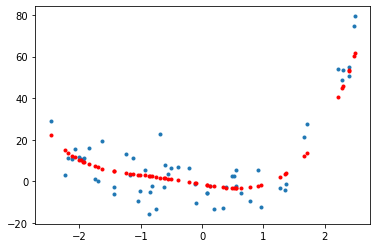

In [96]:
# plot test set
plot_polynomial(X_test, y_test, lin5_predY)

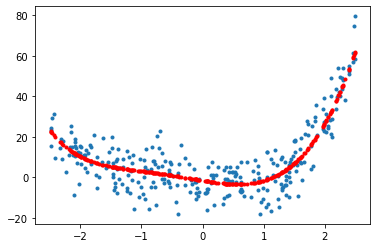

In [97]:
# plot all points
plot_polynomial(X, y, lin5_reg.predict(poly5_features.fit_transform(X)))

In [ ]:
from 